In [31]:
# PASSO 1: Importação da base de dados
import pandas as pd

dados = pd.read_csv('advertising.csv')
display(dados)
print(dados.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [32]:
#  PASSO 2: Calcular a correlação de vendas com cada um dos meios de propaganda (TV, rádio e jornal)

# Correlação = 1 -> Correlação muito próxima
# Correlação = 0 -> Correlação distante 

tabela_corr = dados.corr()
print(tabela_corr)

              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


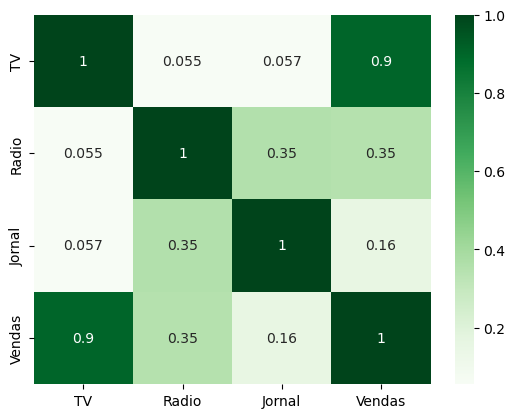

In [33]:
# PASSO 3: Criar um gráfico da correlação
import matplotlib.pyplot as plt
import seaborn as sns

# Criando o gráfico
# Cmap = define a cor do gráfico (nome da cor deve estar no plural)
# Annot = mostra os valores contidos na tabela
sns.heatmap(tabela_corr, cmap='Greens', annot=True)

# Exibindo o gráfico 
plt.show()

In [34]:
# PASSO 4: Separação dos dados em treino e teste

# Trazendo os dados da tabela
# Y = o que queremos prever
# X = Informação que usamos para fazer a previsão
y = dados['Vendas']
x = dados[['TV', 'Radio', 'Jornal']]

# Separando os dados em dados de treino e dados de teste
from sklearn.model_selection import train_test_split

# Test_size = parâmetro que separa a proporção de dados para teste (0.3 = 30%)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)
           

In [35]:
# PASSO 5: Treinamento
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criando a AI
modelo_regressaoLinear = LinearRegression()
modelo_arvoreDecisao = RandomForestRegressor()

# Treino
modelo_regressaoLinear.fit(x_treino, y_treino)
modelo_arvoreDecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [36]:
# PASSO 6:  Previsão
previsao_regressaoLinear = modelo_regressaoLinear.predict(x_teste)
previsao_arvoreDecisao = modelo_arvoreDecisao.predict(x_teste)

# Para verificar qual previsão é mais acertada, precisamos calcular 'R' que significa o % de precisão da previsão comparado ao y_teste
from sklearn.metrics import r2_score
r_regressaoLinear = r2_score(y_teste, previsao_regressaoLinear)
r_arvoreDecisao = r2_score(y_teste, previsao_arvoreDecisao)

print(f'''Previsão da Regressão Linear: {r_regressaoLinear}
Previsão da Árvore de Decisão: {r_arvoreDecisao}''')

Previsão da Regressão Linear: 0.8783800493726936
Previsão da Árvore de Decisão: 0.9179115628037487


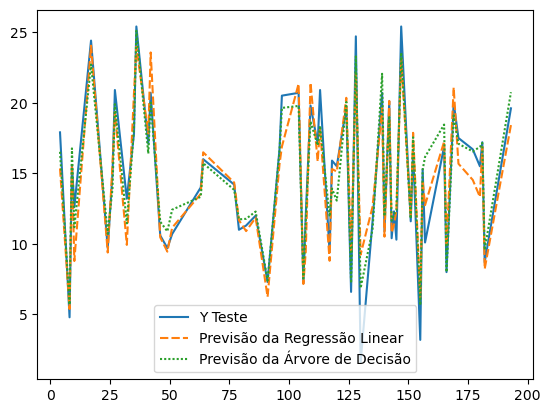

In [37]:
# PASSO 7: Visualização da previsão em gráfico

# Criando uma tabela auxiliar
tabela_grafico = pd.DataFrame()
tabela_grafico['Y Teste'] = y_teste
tabela_grafico['Previsão da Regressão Linear'] = previsao_regressaoLinear
tabela_grafico['Previsão da Árvore de Decisão'] = previsao_arvoreDecisao

# Criando o gráfico
sns.lineplot(data=tabela_grafico)

# Exibindo o gráfico
plt.show()

In [40]:
# PASSO 8: Imprimindo a previsão de acordo com os novos investimentos em propaganda
nova_tabela = pd.read_csv('novos.csv')
nova_previsao = modelo_arvoreDecisao.predict(nova_tabela)
display(nova_tabela)
print(nova_previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.598  8.116 20.748]
